In [67]:
from pathlib import Path
from urllib.parse import urlparse
import requests
import json
from io import BytesIO
from matplotlib import patches
import matplotlib.pyplot as plt
import os
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image, ImageDraw
from io import BytesIO
%matplotlib inline

In [ ]:
pip install azure.cognitiveservices.vision.face

In [68]:
subscription_key = ""

ENDPOINT = ''

face_api_url = "" + '/face/v1.0/detect'

face_api_url_verify = "" + '/face/v1.0/verify'

## Keypointy

In [101]:
def get_keypoints(image_url, subscription_key, face_api_url):

    headers = {'Ocp-Apim-Subscription-Key': subscription_key}

    params = {
        'returnFaceId': 'false',
        'returnFaceLandmarks': 'true',
    }
        
    response = requests.post(face_api_url, params=params,
                         headers=headers, json={"url": image_url})

    keypoints = response.json()
    #print(json.dumps(response.json(),indent=2))

    return keypoints

### Test działania

In [102]:
image_url = 'https://i.insider.com/5cfeb50f25f2e710336b7857?width=700'

In [103]:
get_keypoints(image_url, subscription_key, face_api_url)

[
  {
    "faceRectangle": {
      "top": 152,
      "left": 287,
      "width": 220,
      "height": 220
    },
    "faceLandmarks": {
      "pupilLeft": {
        "x": 347.9,
        "y": 210.1
      },
      "pupilRight": {
        "x": 444.1,
        "y": 207.6
      },
      "noseTip": {
        "x": 401.5,
        "y": 276.1
      },
      "mouthLeft": {
        "x": 355.9,
        "y": 314.5
      },
      "mouthRight": {
        "x": 437.7,
        "y": 313.5
      },
      "eyebrowLeftOuter": {
        "x": 301.0,
        "y": 195.3
      },
      "eyebrowLeftInner": {
        "x": 373.7,
        "y": 192.6
      },
      "eyeLeftOuter": {
        "x": 331.5,
        "y": 213.4
      },
      "eyeLeftTop": {
        "x": 346.7,
        "y": 205.9
      },
      "eyeLeftBottom": {
        "x": 347.8,
        "y": 217.5
      },
      "eyeLeftInner": {
        "x": 364.0,
        "y": 213.9
      },
      "eyebrowRightInner": {
        "x": 425.6,
        "y": 189.9
      },
   

[{'faceRectangle': {'top': 152, 'left': 287, 'width': 220, 'height': 220},
  'faceLandmarks': {'pupilLeft': {'x': 347.9, 'y': 210.1},
   'pupilRight': {'x': 444.1, 'y': 207.6},
   'noseTip': {'x': 401.5, 'y': 276.1},
   'mouthLeft': {'x': 355.9, 'y': 314.5},
   'mouthRight': {'x': 437.7, 'y': 313.5},
   'eyebrowLeftOuter': {'x': 301.0, 'y': 195.3},
   'eyebrowLeftInner': {'x': 373.7, 'y': 192.6},
   'eyeLeftOuter': {'x': 331.5, 'y': 213.4},
   'eyeLeftTop': {'x': 346.7, 'y': 205.9},
   'eyeLeftBottom': {'x': 347.8, 'y': 217.5},
   'eyeLeftInner': {'x': 364.0, 'y': 213.9},
   'eyebrowRightInner': {'x': 425.6, 'y': 189.9},
   'eyebrowRightOuter': {'x': 478.7, 'y': 186.9},
   'eyeRightInner': {'x': 425.1, 'y': 213.1},
   'eyeRightTop': {'x': 440.7, 'y': 203.5},
   'eyeRightBottom': {'x': 441.4, 'y': 215.2},
   'eyeRightOuter': {'x': 459.4, 'y': 210.2},
   'noseRootLeft': {'x': 385.9, 'y': 218.9},
   'noseRootRight': {'x': 410.4, 'y': 218.9},
   'noseLeftAlarTop': {'x': 380.0, 'y': 259.5},

## Emocje

In [104]:
def get_emotions(image_url, subscription_key, face_api_url):

    headers = {'Ocp-Apim-Subscription-Key': subscription_key}

    params = {
        'returnFaceId': 'false',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'emotion'
    }
        
    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    emotions = response.json()

    #print(json.dumps(emotions[0]['faceAttributes']['emotion'],indent=2))

    return emotions

### Test

In [106]:
get_emotions(image_url, subscription_key, face_api_url)

{
  "anger": 0.0,
  "contempt": 0.004,
  "disgust": 0.0,
  "fear": 0.0,
  "happiness": 0.01,
  "neutral": 0.986,
  "sadness": 0.0,
  "surprise": 0.0
}


[{'faceRectangle': {'top': 152, 'left': 287, 'width': 220, 'height': 220},
  'faceAttributes': {'emotion': {'anger': 0.0,
    'contempt': 0.004,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.01,
    'neutral': 0.986,
    'sadness': 0.0,
    'surprise': 0.0}}}]

## Test działania i przykładowe wizualizacje do keypointów

In [69]:
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(subscription_key))

image_path = os.path.join('./face-test.jpg')
image_data = open(image_path, 'rb')

headers = {'Content-Type': 'application/octet-stream',
'Ocp-Apim-Subscription-Key': subscription_key}
params = {
'returnFaceId': 'true',
'returnFaceLandmarks': 'true'
}

response = requests.post(face_api_url, params=params, headers=headers, data=image_data)
response.raise_for_status()

faces = response.json()
print(json.dumps(faces,indent=2))

[
  {
    "faceId": "8e11d814-9e0f-4791-94fa-804b33602621",
    "faceRectangle": {
      "top": 248,
      "left": 336,
      "width": 396,
      "height": 396
    },
    "faceLandmarks": {
      "pupilLeft": {
        "x": 447.7,
        "y": 352.4
      },
      "pupilRight": {
        "x": 618.3,
        "y": 353.1
      },
      "noseTip": {
        "x": 537.1,
        "y": 456.5
      },
      "mouthLeft": {
        "x": 463.7,
        "y": 548.5
      },
      "mouthRight": {
        "x": 605.3,
        "y": 543.3
      },
      "eyebrowLeftOuter": {
        "x": 370.7,
        "y": 319.6
      },
      "eyebrowLeftInner": {
        "x": 494.4,
        "y": 316.7
      },
      "eyeLeftOuter": {
        "x": 417.9,
        "y": 360.8
      },
      "eyeLeftTop": {
        "x": 445.4,
        "y": 344.1
      },
      "eyeLeftBottom": {
        "x": 445.4,
        "y": 367.6
      },
      "eyeLeftInner": {
        "x": 474.5,
        "y": 360.6
      },
      "eyebrowRightInner":

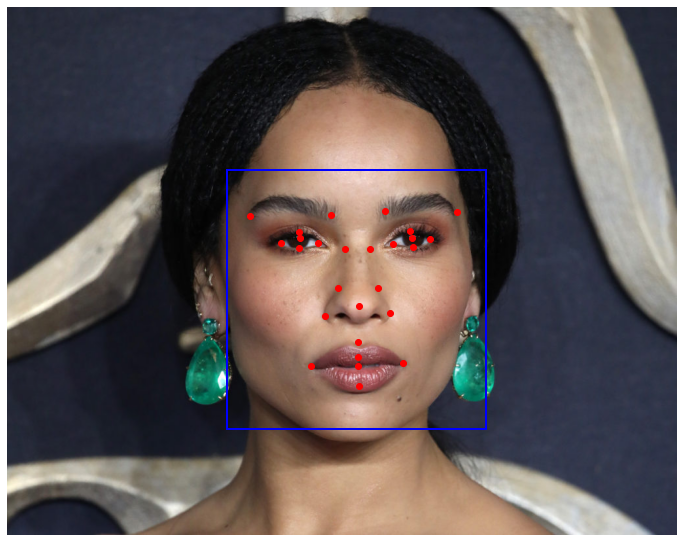

In [70]:
image_orig = open(image_path, 'rb').read()
image = Image.open(BytesIO(image_orig))
plt.figure(figsize=(12, 12))
ax = plt.imshow(image, alpha=1)
faces = response.json()
for face in faces:
    fr = face['faceRectangle']
    flm = face['faceLandmarks']
    pupilLeft = flm['pupilLeft']
    pupilRight = flm['pupilRight']
    noseTip = flm['noseTip']
    mouthLeft = flm['mouthLeft']
    mouthRight = flm['mouthRight']
    eyebrowLeftOuter = flm['eyebrowLeftOuter']
    eyebrowLeftInner = flm['eyebrowLeftInner']
    eyeLeftInner = flm['eyeLeftInner']
    eyeLeftTop = flm['eyeLeftTop']
    eyeLeftBottom = flm['eyeLeftBottom']
    eyeLeftOuter = flm['eyeLeftOuter']
    eyebrowRightInner = flm['eyebrowRightInner']
    eyebrowRightOuter = flm['eyebrowRightOuter']
    eyeRightInner = flm['eyeRightInner']
    eyeRightTop = flm['eyeRightTop']
    eyeRightBottom = flm['eyeRightBottom']
    eyeRightOuter = flm['eyeRightOuter']
    noseRootLeft = flm['noseRootLeft']
    noseRootRight = flm['noseRootRight']
    noseLeftAlarTop = flm['noseLeftAlarTop']
    noseRightAlarTop = flm['noseRightAlarTop']
    noseLeftAlarOutTip = flm['noseLeftAlarOutTip']
    noseRightAlarOutTip = flm['noseRightAlarOutTip']
    upperLipTop = flm['upperLipTop']
    upperLipBottom = flm['upperLipBottom']
    underLipTop = flm['underLipTop']
    underLipBottom = flm['underLipBottom']
    
    origin = (fr['left'], fr['top'])
    p = patches.Rectangle(
    origin, fr['width'], fr['height'], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    _ = plt.axis('off')
    plt.scatter(pupilLeft['x'],pupilLeft['y'],color='red')
    plt.scatter(pupilRight['x'],pupilRight['y'],color='red')
    plt.scatter(noseTip['x'],noseTip['y'],color='red')
    plt.scatter(mouthLeft['x'],mouthLeft['y'],color='red')
    plt.scatter(mouthRight['x'],mouthRight['y'],color='red')
    plt.scatter(eyebrowLeftInner['x'],eyebrowLeftInner['y'],color='red')
    plt.scatter(eyebrowLeftOuter['x'],eyebrowLeftOuter['y'],color='red')
    plt.scatter(eyeLeftInner['x'],eyeLeftInner['y'],color='red')
    plt.scatter(eyeLeftTop['x'],eyeLeftTop['y'],color='red')
    plt.scatter(eyeLeftBottom['x'],eyeLeftBottom['y'],color='red')
    plt.scatter(eyeLeftOuter['x'],eyeLeftOuter['y'],color='red')
    plt.scatter(eyebrowRightInner['x'],eyebrowRightInner['y'],color='red')
    plt.scatter(eyebrowRightOuter['x'],eyebrowRightOuter['y'],color='red')
    plt.scatter(eyeRightInner['x'],eyeRightInner['y'],color='red')
    plt.scatter(eyeRightTop['x'],eyeRightTop['y'],color='red')
    plt.scatter(eyeRightBottom['x'],eyeRightBottom['y'],color='red')
    plt.scatter(eyeRightOuter['x'],eyeRightOuter['y'],color='red')
    plt.scatter(noseRootLeft['x'],noseRootLeft['y'],color='red')
    plt.scatter(noseRootRight['x'],noseRootRight['y'],color='red')
    plt.scatter(noseLeftAlarTop['x'],noseLeftAlarTop['y'],color='red')
    plt.scatter(noseRightAlarTop['x'],noseRightAlarTop['y'],color='red')
    plt.scatter(noseLeftAlarOutTip['x'],noseLeftAlarOutTip['y'],color='red')
    plt.scatter(noseRightAlarOutTip['x'],noseRightAlarOutTip['y'],color='red')
    plt.scatter(upperLipTop['x'],upperLipTop['y'],color='red')
    plt.scatter(upperLipBottom['x'],upperLipBottom['y'],color='red')
    plt.scatter(underLipTop['x'],underLipTop['y'],color='red')
    plt.scatter(underLipBottom['x'],underLipBottom['y'],color='red')

plt.show()